<a href="https://colab.research.google.com/github/JosePabloGFnl/Tensorflow-Practice/blob/main/Module7ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#-------------REINFORCEMENT LEARNING WITH Q-LEARNING-------------

#consult notebook for explination and important concepts
#this module is just an introduction

In [ ]:
#Q-Learning example

import gym   # all you have to do to import and use open ai gym!

In [ ]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

In [ ]:
#commands used to interact with information in the environment

print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [ ]:
env.reset()  # reset enviornment to default state

0

In [ ]:
action = env.action_space.sample()  # get a random action 
print(action)

3


In [ ]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [ ]:
env.render()   # render the GUI for the enviornment 

#the highlighted square is where the agent is

#h - hole
#g - goal
#s - start

#works better in our own command line

  (Up)
SFFF
FHFH
FFFH
HFFG


In [ ]:
#Frozen Lake Environment

#train an AI to navigate the environment and get to the goal
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q #at the beginning, we take random actions to explore the environment, then
  #with better training, those actions will be closer to the q-table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
#constants
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96 #mess with the values to visualize the training

In [ ]:
#picking an action

#we use one of our two methods

epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

In [ ]:
#updating q values

Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

NameError: ignored

In [ ]:
#putting it all together

import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [ ]:
rewards = [] #store all of the rewards
for episode in range(EPISODES): #steps for episodes

  state = env.reset() #reset state
  for _ in range(MAX_STEPS): #explore the enviroment to max steps
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  #an action for each timestep
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state #when we run the time-step again, the agent is in the next state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

#Rewards:
#1 - step
#0 - die

[[1.74591657e-01 9.92065062e-03 1.00726486e-02 6.91128638e-03]
 [4.71207931e-03 3.82750982e-03 3.11889319e-03 2.28987167e-01]
 [1.56545475e-01 3.67678509e-03 3.71164791e-03 3.72823515e-03]
 [1.16736528e-03 1.74298078e-05 2.82187532e-03 3.68516128e-03]
 [1.93298978e-01 8.82487210e-03 3.87392420e-03 5.81246629e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.35823507e-01 7.11577332e-07 6.68889461e-07 7.12855144e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.12223390e-03 2.42999786e-03 3.07075071e-03 2.73608569e-01]
 [1.78650864e-03 5.11154617e-01 2.71404259e-03 3.71491704e-03]
 [8.19869213e-01 1.53584954e-04 4.92031058e-05 2.01712601e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.63972712e-02 1.82312043e-02 8.41124008e-01 0.00000000e+00]
 [8.38827891e-02 9.88205250e-01 4.42316162e-02 8.15548648e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

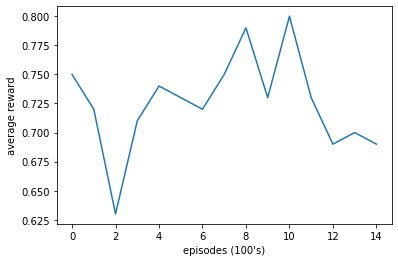

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

#this is so cool
#it changes each time we train, obviously